<ipython-input-1-4eb2736fa8a4>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  time_series["Rolling Mean"].fillna(0, inplace=True)
<ipython-input-1-4eb2736fa8a4>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

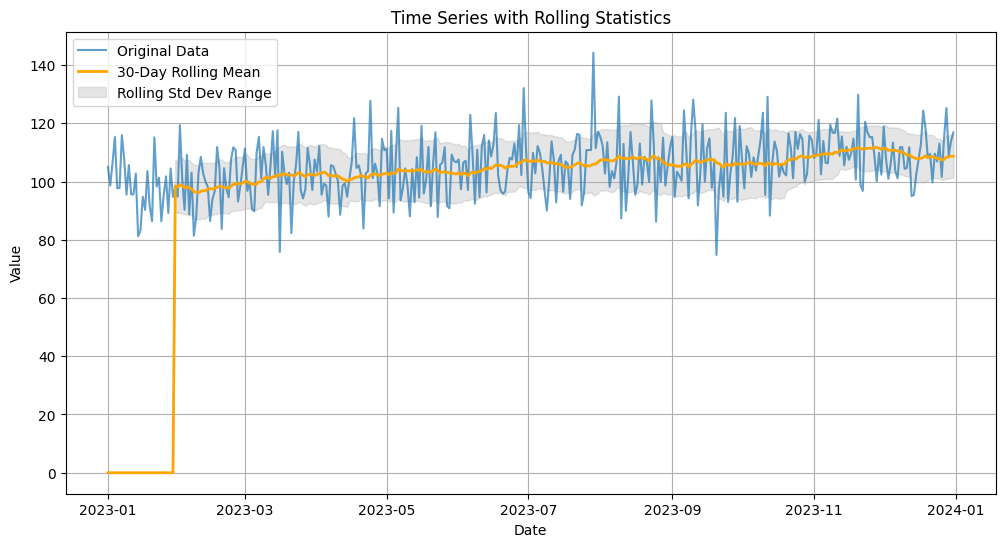

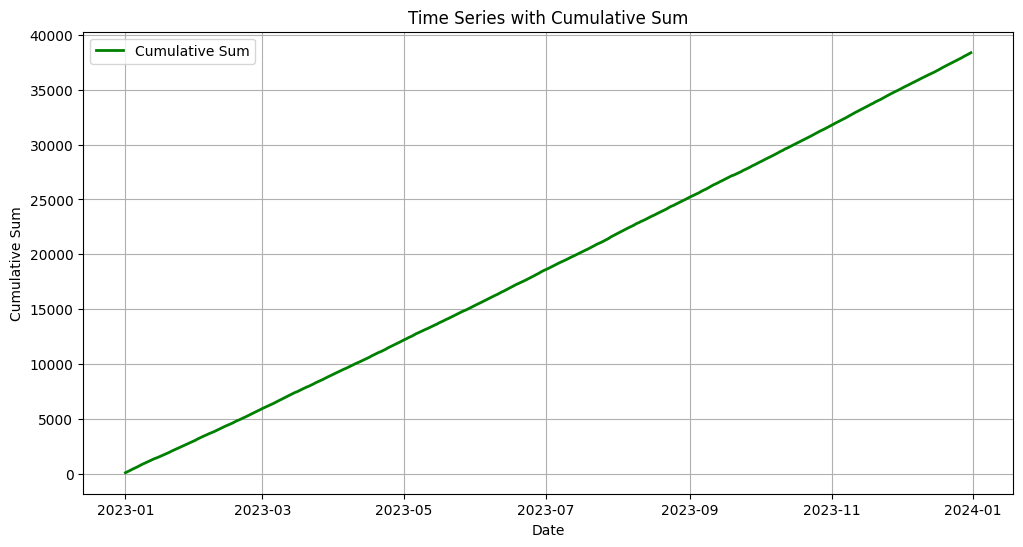

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate synthetic time series data
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
data = np.random.normal(loc=100, scale=10, size=len(dates)) + np.linspace(0, 10, len(dates))

# Create a DataFrame for the time series
time_series = pd.DataFrame({"Date": dates, "Value": data})
time_series.set_index("Date", inplace=True)

# Step 2: Calculate rolling mean and standard deviation (rolling statistics)
rolling_window = 30  # 30-day rolling window
time_series["Rolling Mean"] = time_series["Value"].rolling(window=rolling_window).mean()
time_series["Rolling Std"] = time_series["Value"].rolling(window=rolling_window).std()

# Handle NaN values (fill with 0 for visualization)
time_series["Rolling Mean"].fillna(0, inplace=True)
time_series["Rolling Std"].fillna(0, inplace=True)

# Step 3: Visualize the original data and rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series["Value"], label="Original Data", alpha=0.7)
plt.plot(time_series.index, time_series["Rolling Mean"], label="30-Day Rolling Mean", color="orange", linewidth=2)
plt.fill_between(
    time_series.index,
    time_series["Rolling Mean"] - time_series["Rolling Std"],
    time_series["Rolling Mean"] + time_series["Rolling Std"],
    color="gray",
    alpha=0.2,
    label="Rolling Std Dev Range",
)
plt.title("Time Series with Rolling Statistics")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Apply a custom window function: cumulative sum
time_series["Cumulative Sum"] = time_series["Value"].expanding().sum()

# Step 5: Visualize the cumulative sum
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series["Cumulative Sum"], label="Cumulative Sum", color="green", linewidth=2)
plt.title("Time Series with Cumulative Sum")
plt.xlabel("Date")
plt.ylabel("Cumulative Sum")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np

# Step 1: Base revenue for each store (rows: stores, columns: days of the week)
base_revenue = np.array([
    [200, 220, 250, 270, 300, 310, 280],  # Store 1
    [150, 160, 180, 200, 210, 220, 190],  # Store 2
    [100, 110, 120, 130, 140, 150, 160],  # Store 3
])

# Step 2: Promotional discounts applied (same across stores, vary by day)
daily_discounts = np.array([10, 20, 15, 25, 30, 20, 10])

adjusted_revenue = base_revenue - (base_revenue * daily_discounts / 100)

print("Adjusted Revenue for Each Store:")
print(adjusted_revenue)

Adjusted Revenue for Each Store:
[[180.  176.  212.5 202.5 210.  248.  252. ]
 [135.  128.  153.  150.  147.  176.  171. ]
 [ 90.   88.  102.   97.5  98.  120.  144. ]]


In [3]:
import numpy as np

# Step 1: Customer purchase data (rows = customers, columns = products)
# Number of units purchased by each customer
purchase_data = np.array([
    [2, 1, 3],  # Customer 1
    [0, 2, 4],  # Customer 2
    [5, 0, 1],  # Customer 3
])


# Step 2: Product prices (column vector, one price per product)
product_prices = np.array([[10, 20, 15],[12,13,14]])  # Prices for Product A, B, and C

revenue_per_customer = np.dot(purchase_data, product_prices.T)

print("Revenue Generated by Each Customer:")
print(revenue_per_customer)

Revenue Generated by Each Customer:
[[ 85  79]
 [100  82]
 [ 65  74]]


In [4]:
weights = np.array([0.5, 0.3, 0.2])

# Step 2: Define the covariance matrix of asset returns
# Variance and covariance between Asset A, B, and C
cov_matrix = np.array([
    [0.04, 0.02, 0.01],  # Variance and covariance for Asset A
    [0.02, 0.03, 0.015], # Variance and covariance for Asset B
    [0.01, 0.015, 0.05]  # Variance and covariance for Asset C
])

portfolio_variance = np.dot(weights, np.dot(cov_matrix, weights.T))

portfolio_std = np.sqrt(portfolio_variance)

print("Portfolio Variance:", portfolio_variance)
print("Portfolio Standard Deviation:(Risk)", portfolio_std)

Portfolio Variance: 0.0245
Portfolio Standard Deviation:(Risk) 0.15652475842498528


In [5]:
data = np.array([[2, 4, 6], [1, 3, 5]])

data_transposed = data.T

cov_matrix = np.cov(data_transposed)

print(cov_matrix)

[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]


In [6]:
movie_ratings = np.array([
    [5, 1, 4],
    [4, 4, 2],
    [4, 3, 5],
    [1, 1, 5],
    [3, 2, 1]
])

average_ratings = np.mean(movie_ratings, axis=0)
print(average_ratings)



[3.4 2.2 3.4]


In [7]:
viewer_preferences=[]

for viewer in movie_ratings:
  max_rating = max(viewer)
  max_index = np.where(viewer == max_rating)[0][0]
  viewer_preferences.append(max_index+1)

print(viewer_preferences)

[1, 1, 3, 3, 1]


In [8]:
np.max(movie_ratings, axis=1)


array([5, 4, 5, 5, 3])

In [9]:
viewer_preferences = np.argmax(movie_ratings, axis=1) +1
viewer_preferences

array([1, 1, 3, 3, 1])

t-statistic = show the magnitude of the difference

p-value= if p < 0.05,we reject the null hypothesis and conclude that the sample mean is significantly different the population mean

In [10]:
import numpy as np
from scipy.stats import ttest_1samp

# Step 1: Generate sample data (observed engagement durations for 30 customers)
# Hypothetical sample engagement durations (in minutes)
engagement_durations = np.array([16, 18, 20, 22, 19, 21, 17, 23, 20, 19,
                                  18, 16, 21, 22, 20, 19, 17, 16, 20, 21,
                                  18, 20, 19, 22, 23, 21, 18, 17, 19, 20])

null_hypothesis_mean = 15

t_statistsic, p_value = ttest_1samp(engagement_durations, null_hypothesis_mean)

print("T-statistic:", t_statistsic)
print("P-value:", p_value)

sample_mean = np.mean(engagement_durations)
print("Sample Mean:", sample_mean)

alpha=0.05

if p_value < alpha:
    print("Reject the Null Hypothesis (H0): The average engagement duration is significantly greater than 15 minutes.")
else:
    print("Fail to Reject the Null Hypothesis (H0): No significant evidence that the average engagement duration is greater than 15 minutes.")

T-statistic: 11.887052343740171
P-value: 1.139686520765904e-12
Sample Mean: 19.4
Reject the Null Hypothesis (H0): The average engagement duration is significantly greater than 15 minutes.


In [11]:
import numpy as np
import pandas as pd
import time

# Generate random data for benchmarking
np.random.seed(42)
data = np.random.rand(10_000_000)  # Larger dataset to highlight differences

# Benchmark NumPy standard deviation
start_numpy = time.time()
numpy_std = np.std(data)
end_numpy = time.time()

# Benchmark Pandas standard deviation
data_series = pd.Series(data)
start_pandas = time.time()
pandas_std = data_series.std()
end_pandas = time.time()

# Print results for standard deviation
print("NumPy std:", numpy_std, "Time:", end_numpy - start_numpy, "seconds")
print("Pandas std:", pandas_std, "Time:", end_pandas - start_pandas, "seconds")

# Benchmark NumPy summation
start_numpy_sum = time.time()
numpy_sum = np.sum(data)
end_numpy_sum = time.time()

# Benchmark Pandas summation
start_pandas_sum = time.time()
pandas_sum = data_series.sum()
end_pandas_sum = time.time()

# Print results for summation
print("NumPy sum:", numpy_sum, "Time:", end_numpy_sum - start_numpy_sum, "seconds")
print("Pandas sum:", pandas_sum, "Time:", end_pandas_sum - start_pandas_sum, "seconds")


NumPy std: 0.288674870636644 Time: 0.11291837692260742 seconds
Pandas std: 0.28867488507036615 Time: 0.07514691352844238 seconds
NumPy sum: 4999924.803836267 Time: 0.008556604385375977 seconds
Pandas sum: 4999924.803836267 Time: 0.024790525436401367 seconds


In [12]:
import numpy as np

# Annual returns of the investment
returns = np.array([0.08, 0.12, -0.05, 0.10, 0.07])

# Calculating variance
variance = np.var(returns)
print("Variance of the investment returns:", variance)

Variance of the investment returns: 0.003544



You are tasked with analyzing a dataset of student exam scores. The goal is to determine whether the exam preparation program significantly improved scores and to assess the distribution of the scores using skewness and kurtosis.

Scenario
A group of students participated in a preparation program. Their scores before and after the program were recorded. You will:
Perform a paired t-test to determine if the program significantly improved scores.
Calculate the skewness of the post-program scores to assess symmetry.
Calculate the kurtosis of the post-program scores to evaluate the presence of outliers or the sharpness of the distribution peak.
Draw conclusions from these findings.



Tasks
1. Paired t-test
Perform a paired t-test on the pre-program and post-program scores to determine if there is a significant improvement.
Null Hypothesis (H0H_0): There is no difference in the scores before and after the program.
Alternative Hypothesis (H1H_1): The scores after the program are significantly higher than before.

2. Skewness
Calculate the skewness of the post-program scores. Based on the value:
Skewness ~ 0: The distribution is symmetric.
Positive skewness: The distribution has a longer tail on the right.
Negative skewness: The distribution has a longer tail on the left.

3. Kurtosis
Calculate the kurtosis of the post-program scores. Based on the value:
Kurtosis ~ 3: The distribution is normal (mesokurtic).
Kurtosis > 3: The distribution is sharp with heavy tails (leptokurtic).
Kurtosis < 3: The distribution is flat with light tails (platykurtic).

4. Draw Conclusions
Based on the t-test, skewness, and kurtosis findings, write a short report answering:
Did the preparation program significantly improve scores?
Are the post-program scores symmetrically distributed?
Are there any outliers or unusual patterns in the post-program scores?

In [13]:
import pandas as pd
from scipy.stats import ttest_rel
# Create a larger dataset
data = {
    "Student_ID": list(range(1, 51)),  # 50 students
    "Pre_Program_Score": [
        65, 70, 68, 72, 64, 66, 74, 68, 71, 75,
        62, 67, 69, 73, 65, 70, 76, 66, 74, 72,
        60, 63, 68, 70, 64, 62, 75, 69, 71, 77,
        63, 65, 72, 74, 68, 64, 66, 70, 72, 75,
        61, 64, 67, 73, 68, 65, 72, 69, 74, 78
    ],
    "Post_Program_Score": [
        72, 75, 74, 78, 70, 72, 80, 74, 76, 80,
        68, 73, 75, 79, 71, 75, 82, 72, 78, 77,
        65, 69, 74, 76, 70, 67, 80, 74, 76, 82,
        68, 70, 78, 80, 74, 70, 72, 76, 78, 81,
        66, 70, 73, 79, 74, 71, 78, 75, 80, 85
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV (optional, if you want to load later)
df.to_csv("student_scores.csv", index=False)

# Display first few rows
print(df.head())


   Student_ID  Pre_Program_Score  Post_Program_Score
0           1                 65                  72
1           2                 70                  75
2           3                 68                  74
3           4                 72                  78
4           5                 64                  70
